In [ ]:
!nvidia-smi

Thu Jun  8 04:49:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Installing Yolo v8**

In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

**Exporting our Annotated Dataset from Roboflow**

In [ ]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="___") #API Key Here
project = rf.workspace("defect-road-detection").project("detection2-wyo5q")
dataset = project.version(8).download("yolov8")


/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=c7054fb00c35acca9f1bda6b7942091ac1563f613c8a3ff76af464aed2680874
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.114, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Detection2-8 in yolov8:: 100%|██████████| 3184/3184 [00:04<00:00, 738.61it/s]


**Model Training**

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=90 imgsz=800

/content
100% 21.5M/21.5M [00:00<00:00, 68.1MB/s]
Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Detection2-8/data.yaml, epochs=90, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

**Model Results**

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1686201820.bd16d6941255.8657.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


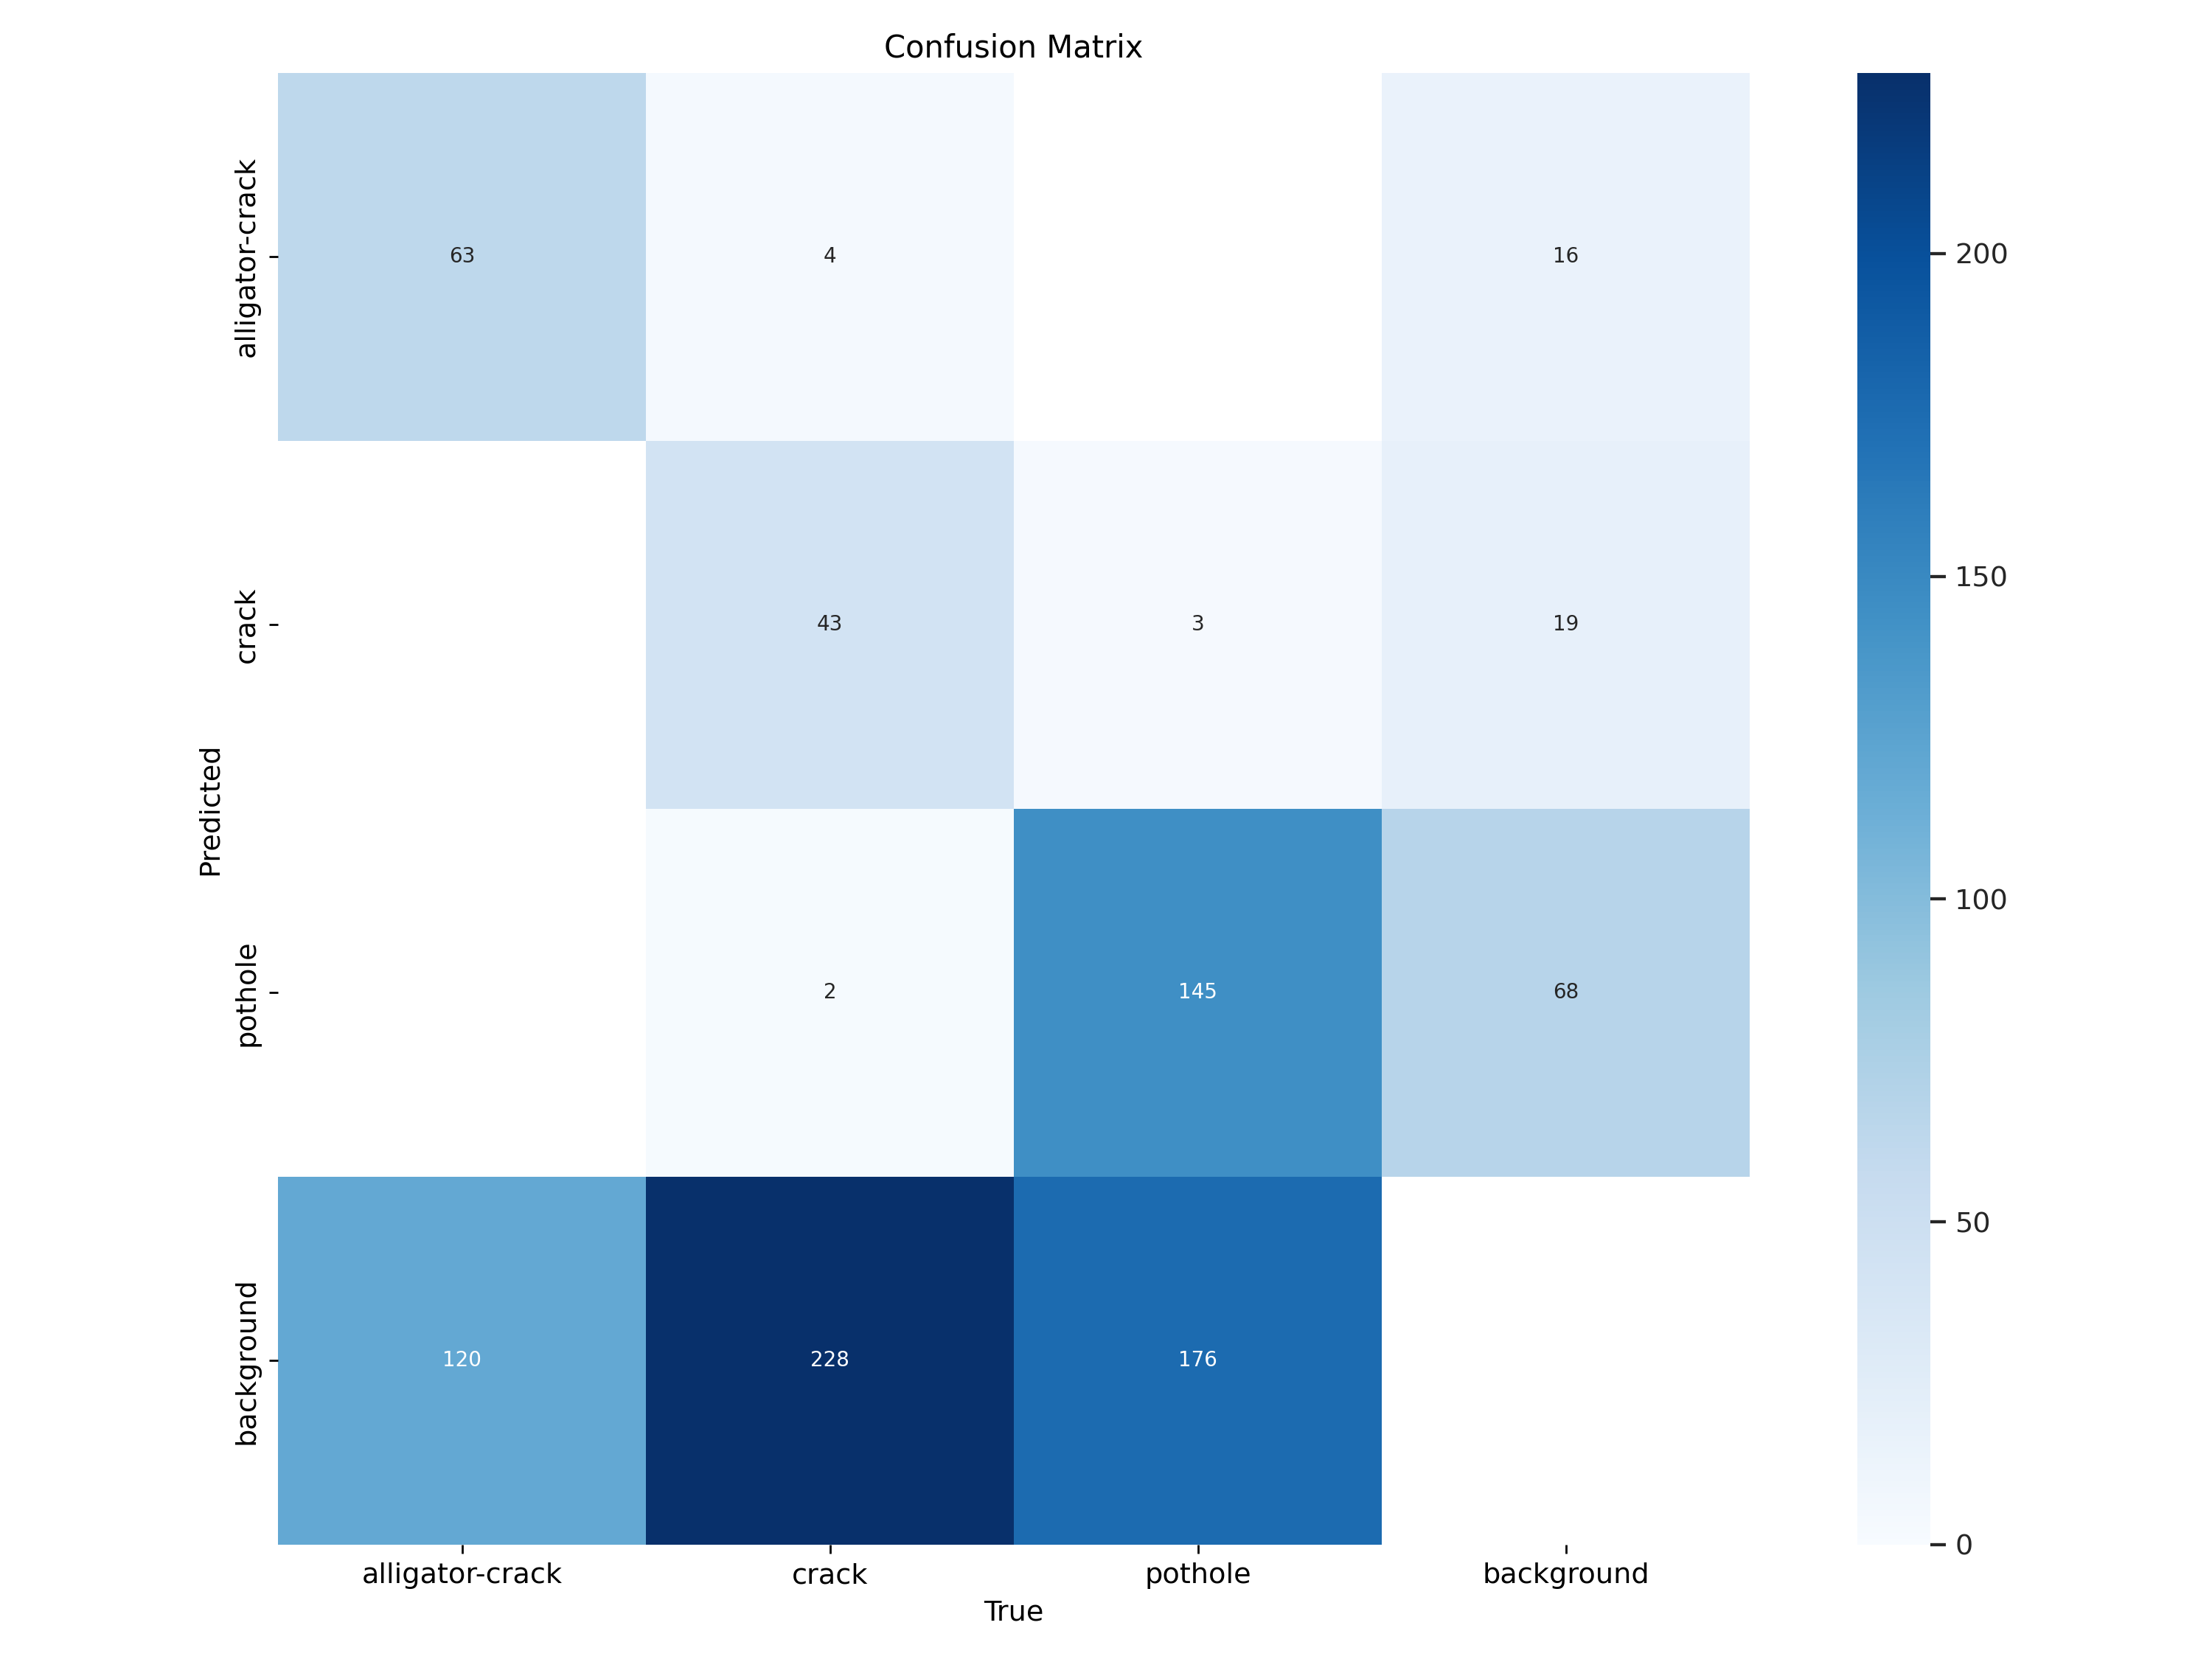

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


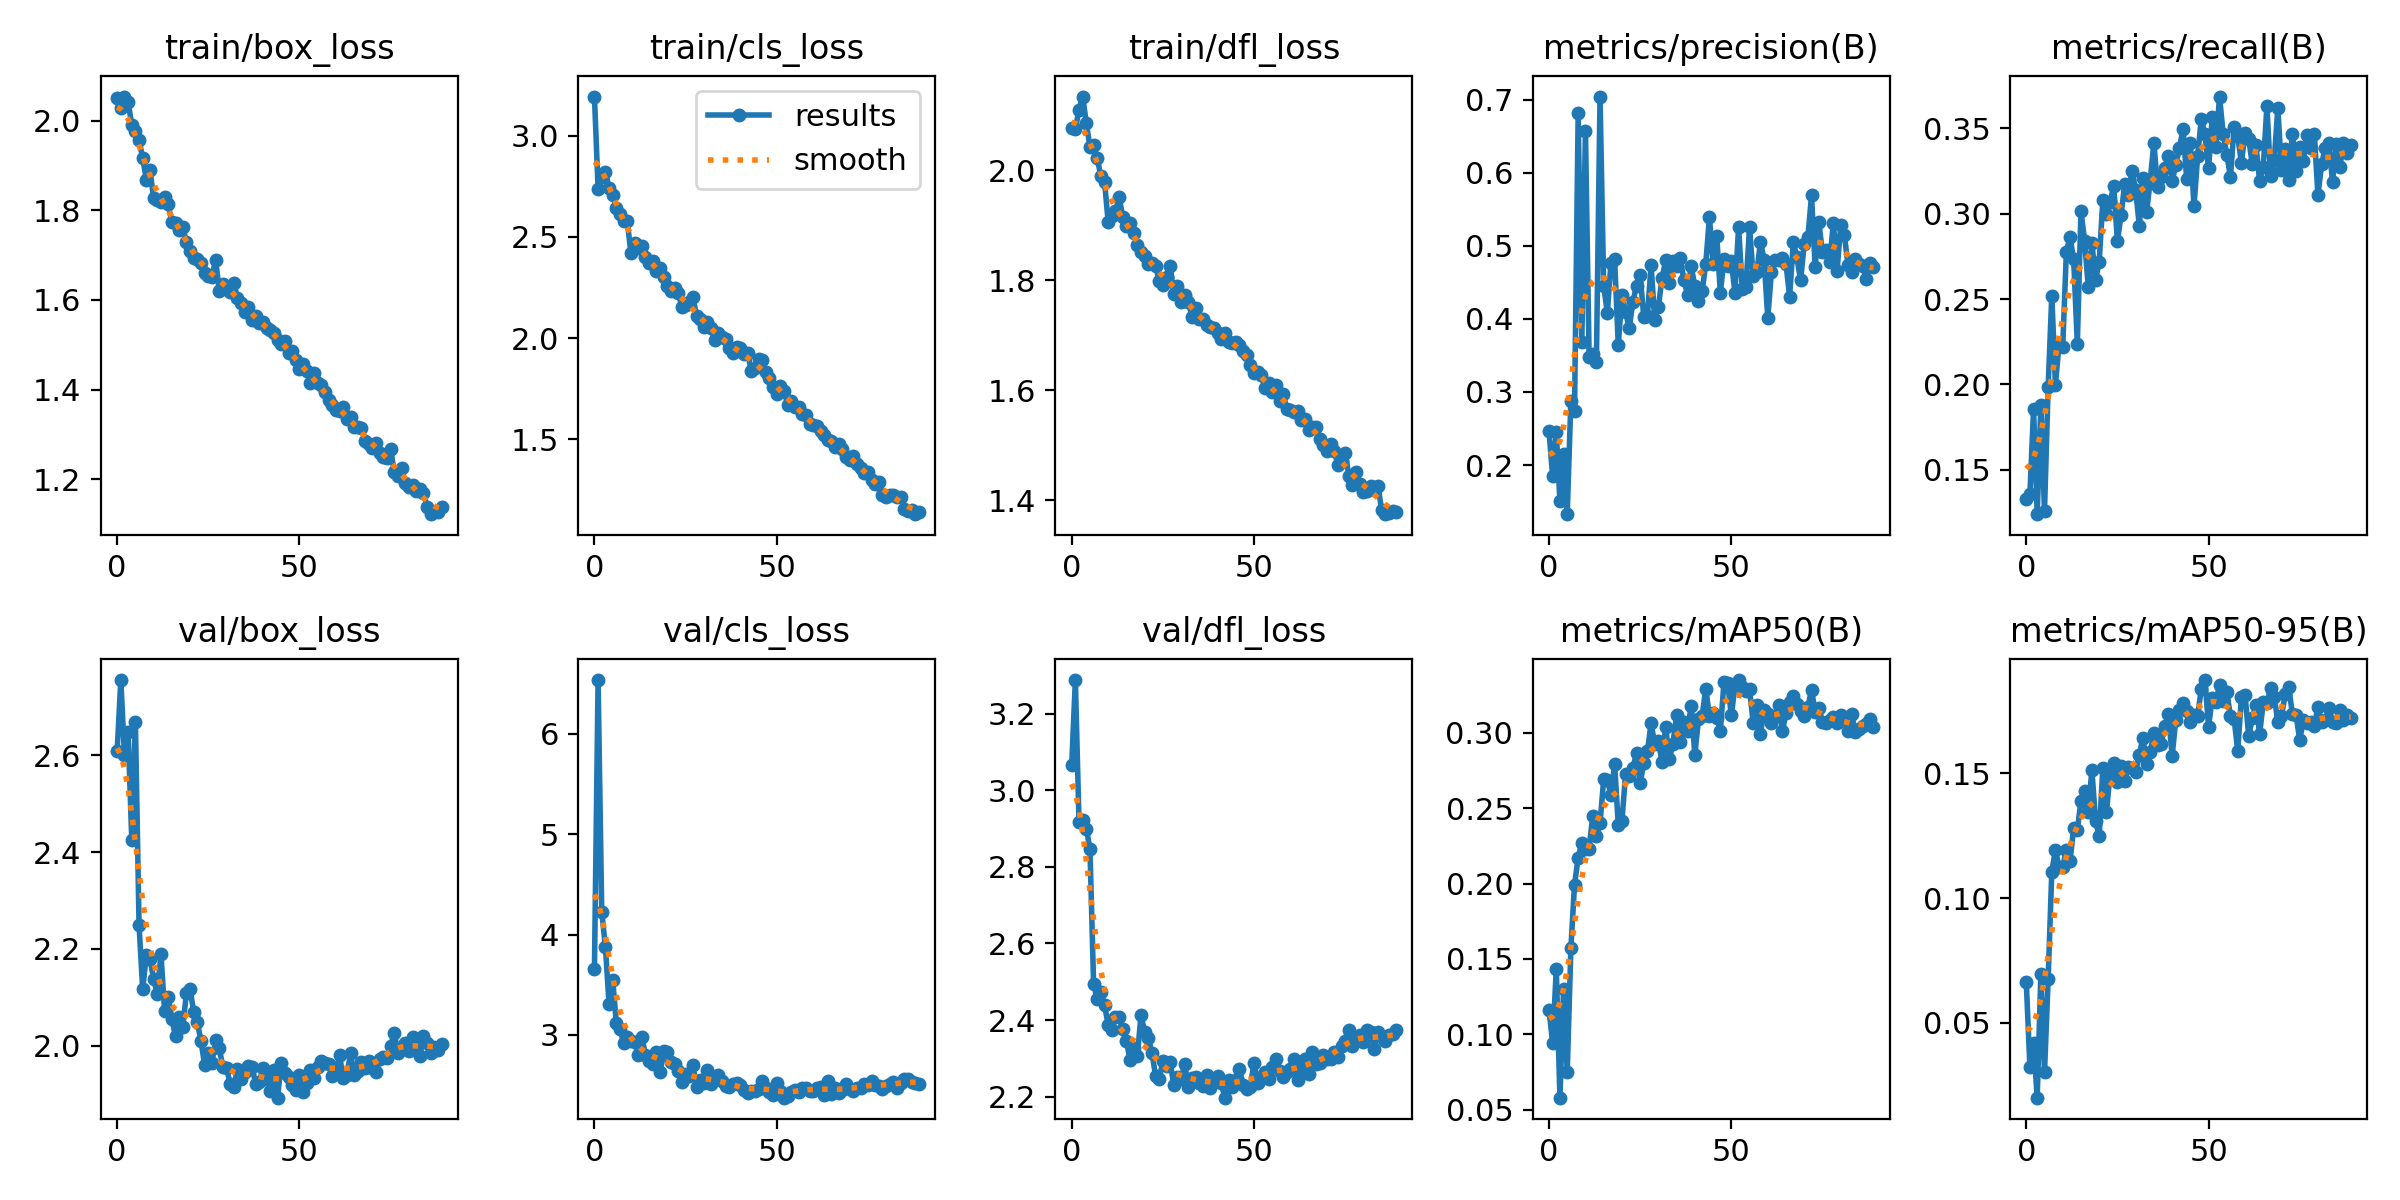

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


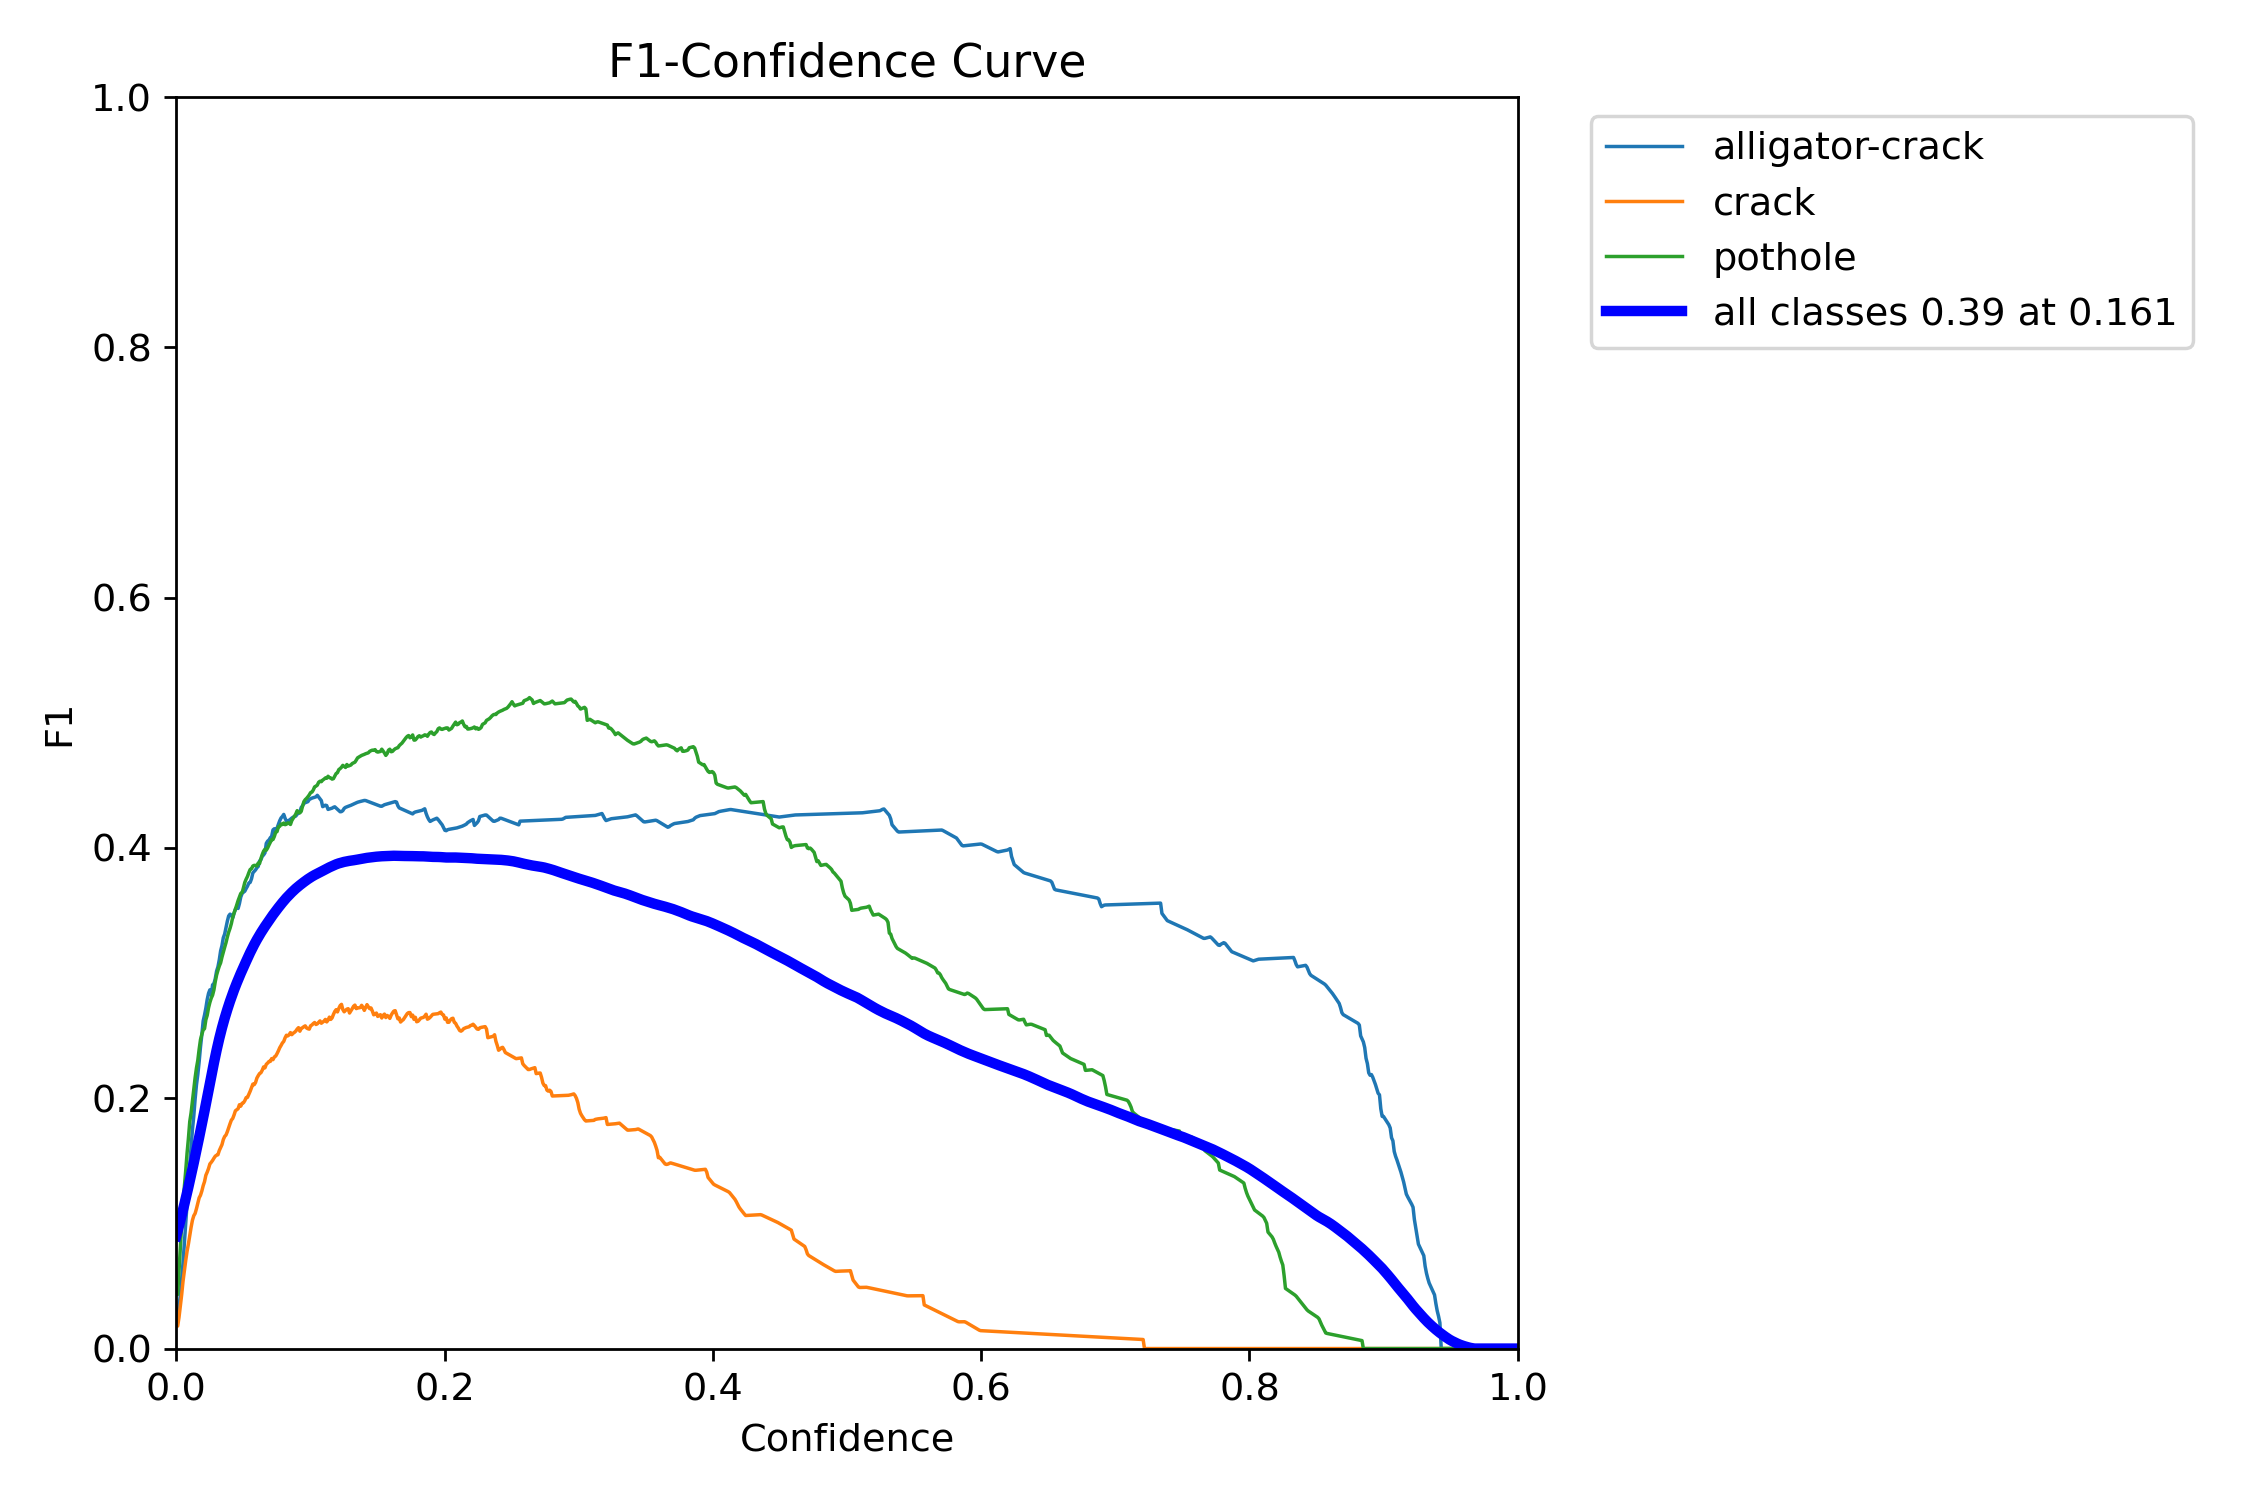

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


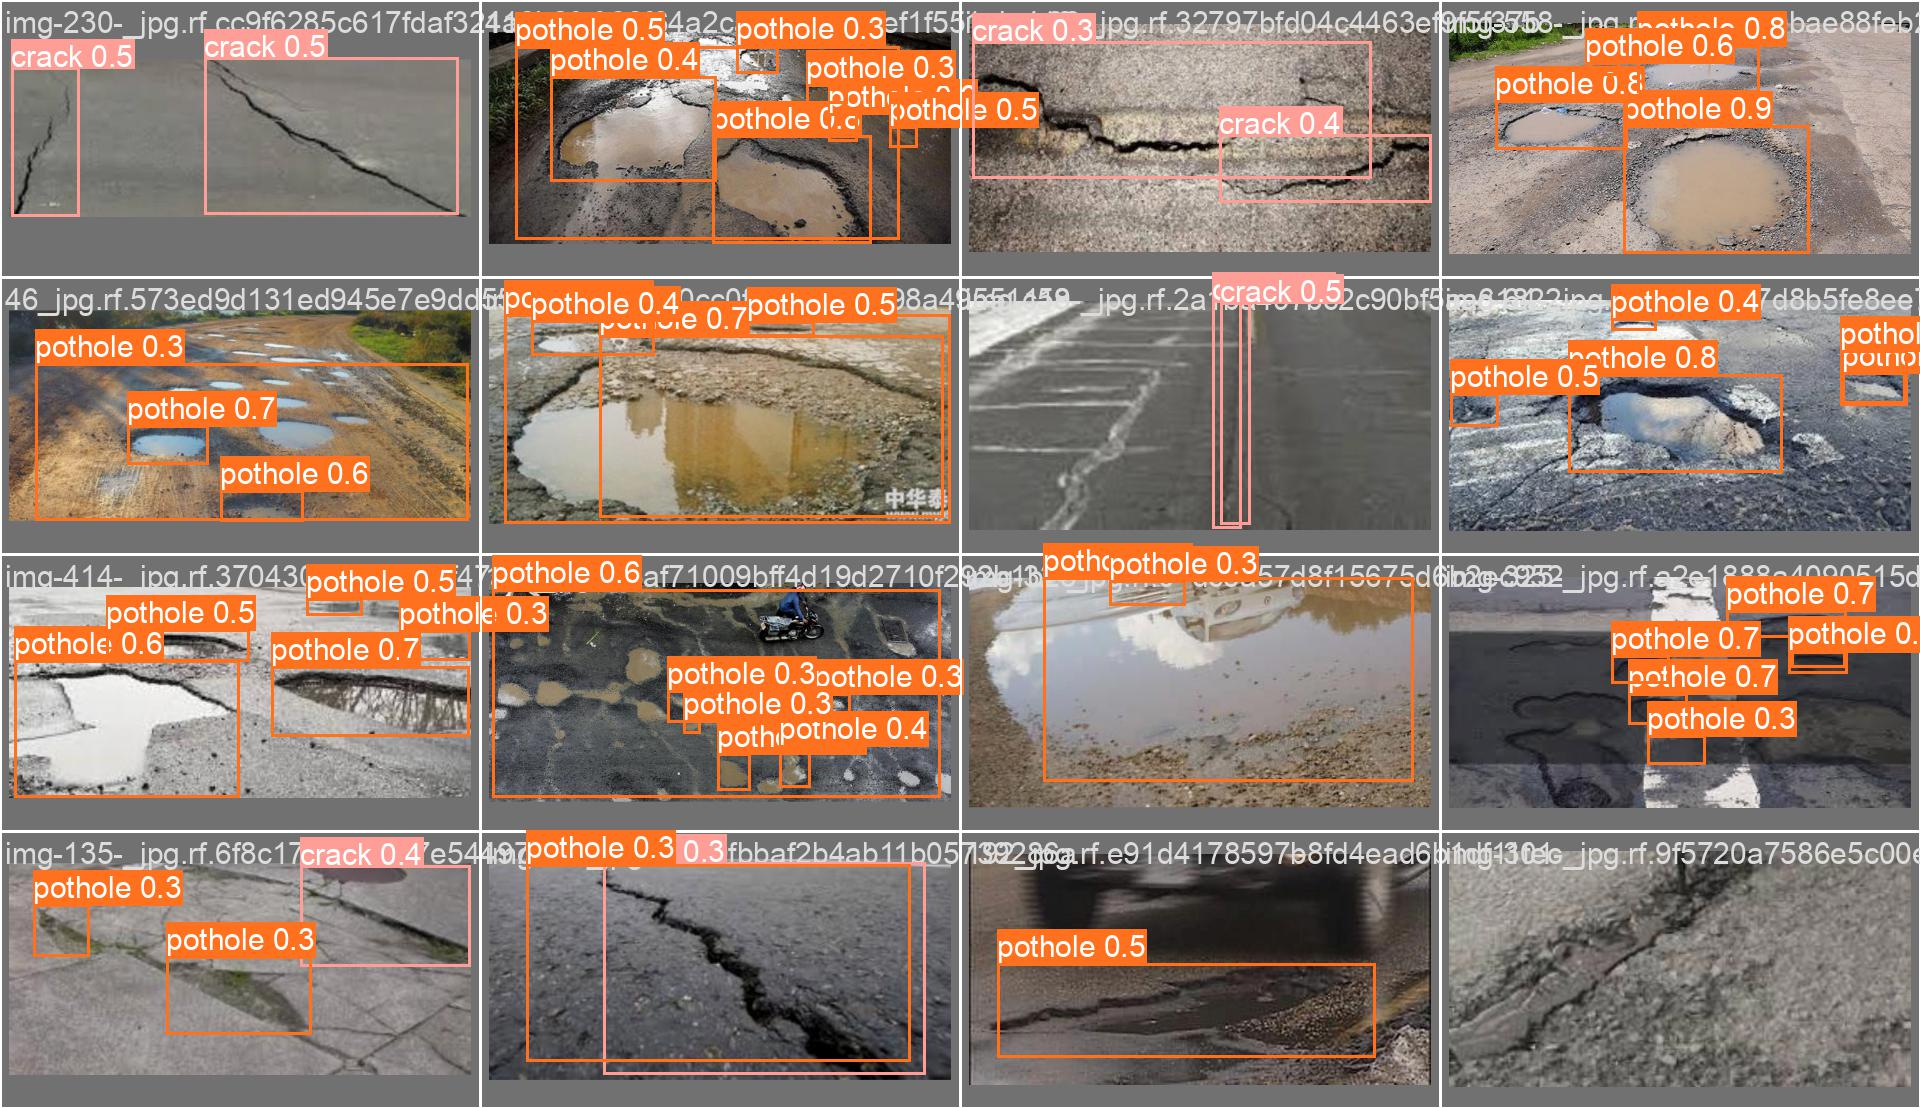

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

**Running the model on Validation Dataset**

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients
val: Scanning /content/Detection2-8/valid/labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100% 270/270 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 759. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:28<00:00,  1.67s/it]
                   all        270        759      0.562      0.325      0.326      0.182
       alligator-crack        270        175        0.7      0.343       0.37      0.274
                 crack        270        266      0.453      0.203      0.178     0.0748
               pothole        270        318 

**Running the model on Test Dataset**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients

image 1/197 /content/Detection2-8/test/images/104_jpg.rf.1e215edb90f826face45aefcdc820596.jpg: 800x800 4 potholes, 24.6ms
image 2/197 /content/Detection2-8/test/images/126_jpg.rf.3e08cbd0bb1954169a0399e0dc76d0f5.jpg: 608x800 4 alligator-cracks, 1 pothole, 59.8ms
image 3/197 /content/Detection2-8/test/images/128_jpg.rf.680aee72f715b5e2c99dfa9f81a44fe9.jpg: 544x800 1 pothole, 59.8ms
image 4/197 /content/Detection2-8/test/images/130_jpg.rf.2977a1e39cc92e56ad8576ec29ccdcf7.jpg: 512x800 1 pothole, 60.1ms
image 5/197 /content/Detection2-8/test/images/136_jpg.rf.7e4521b90a577eb3a3d8fc95acd28c59.jpg: 608x800 1 pothole, 19.0ms
image 6/197 /content/Detection2-8/test/images/140_jpg.rf.eb1d7e183eb357a7abc10f33aa2451a2.jpg: 608x800 1 alligator-crack, 1 pothole, 18.4ms
image 7/197 /content/Detection2-8/test/images/141_jpg.rf.d6744723d0d

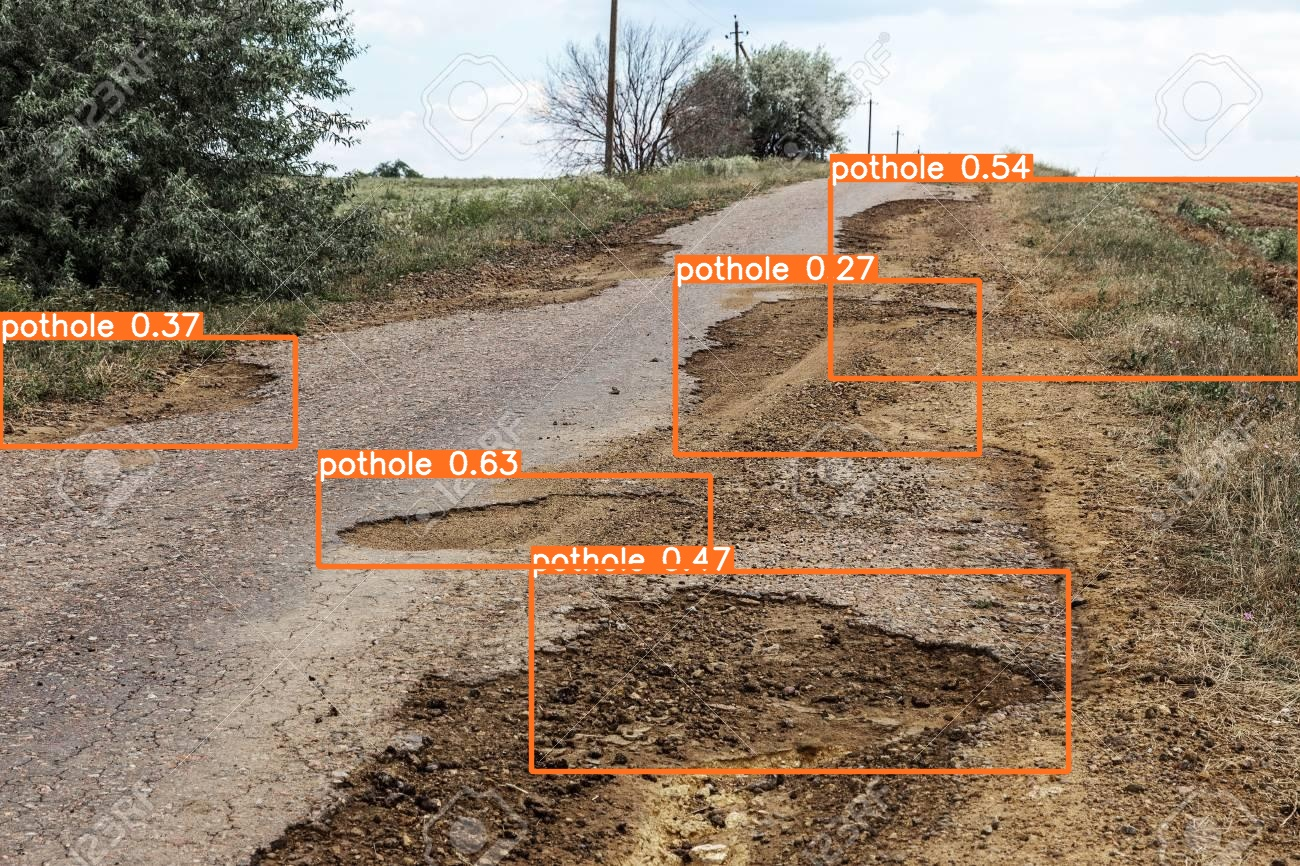

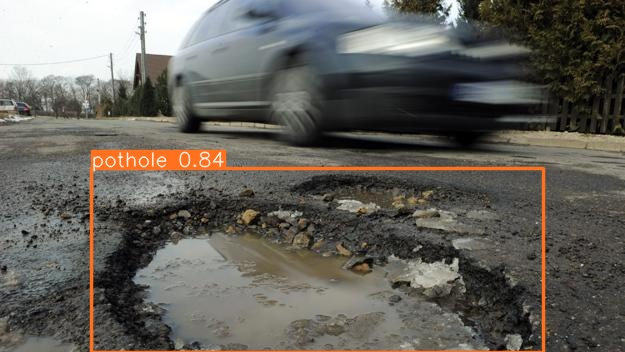

In [ ]:
import glob
from IPython.display import Image, display
for  image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:2]:
  display(Image(filename=image_path,width=600))
  print("\n")

**Test on Local Images and Videos**

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/pottim.jpeg

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/1 /content/pottim.jpeg: 800x608 1 pothole, 63.2ms
Speed: 4.2ms preprocess, 63.2ms inference, 2.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/TV2.mp4

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/1 /content/pred1.jpeg: 800x480 1 pothole, 61.8ms
Speed: 4.4ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3
